In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [75]:
# The code was removed by Watson Studio for sharing.

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
numbers.shape

(42000, 785)

In [4]:
np.unique(numbers['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

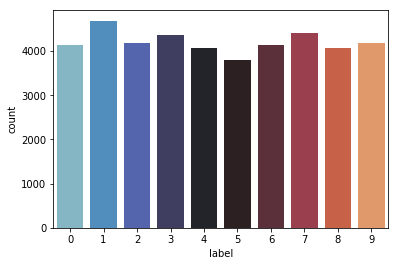

In [5]:
sns.countplot(numbers['label'],palette = 'icefire')

Text(0, 0.5, 'Frequency')

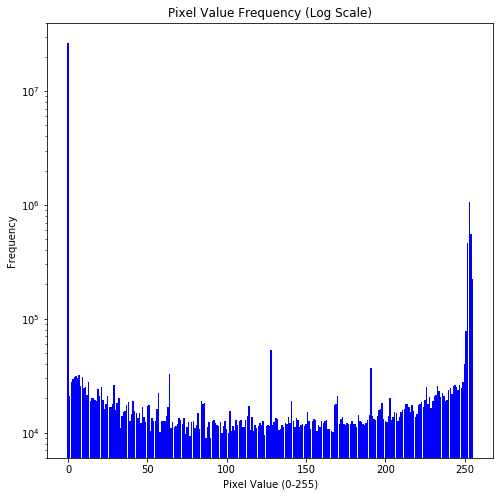

In [6]:
y = pd.value_counts(numbers.values.ravel()).sort_index()
N = len(y)
x = range(N)
width =0.9
plt.figure(figsize=[8,8])
plt.bar(x, y, width, color="blue")
plt.title('Pixel Value Frequency (Log Scale)')
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Digit 4')

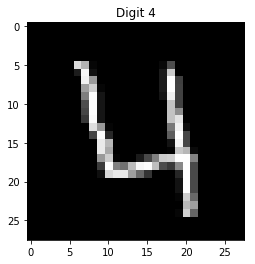

In [7]:
one = numbers.iloc[3, 1:]
one = one.values.reshape(28,28)
plt.imshow(one, cmap=plt.get_cmap('gray'))
plt.title("Digit 4")

Text(0.5, 1.0, 'Digit 3')

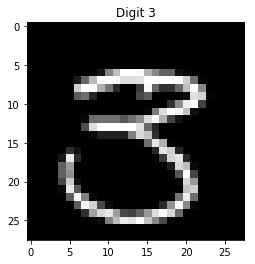

In [77]:
three = numbers.iloc[7, 1:]
three = three.values.reshape(28,28)
plt.imshow(three, cmap=plt.get_cmap('gray'))
plt.title("Digit 3")

In [8]:
# splitting into X and y
X = numbers.drop("label", axis = 1)
y = numbers['label']

In [9]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 13)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  from ipykernel import kernelapp as app


In [10]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [11]:
# predict
y_pred = non_linear_model.predict(X_test)

In [12]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

accuracy: 0.9586904761904762


In [13]:
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

[[808   0   1   2   1   2   4   2   5   0]
 [  0 905   2   3   1   1   3   5   3   2]
 [  4   2 778   5   0   1   0  14   3   1]
 [  2   1  13 813   1  12   1  11   7   5]
 [  0   2   3   1 794   0   3   4   2  14]
 [  4   0   4  14   2 761   8  10   1   2]
 [  3   2   4   0   5   7 800   3   0   0]
 [  0   5   8   1   5   0   0 851   2  15]
 [  2   2   4   8   5   6   4   7 790   2]
 [  3   3   4   8   4   3   0  22   6 753]]


In [14]:
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       825
           1       0.98      0.98      0.98       925
           2       0.95      0.96      0.96       808
           3       0.95      0.94      0.94       866
           4       0.97      0.96      0.97       823
           5       0.96      0.94      0.95       806
           6       0.97      0.97      0.97       824
           7       0.92      0.96      0.94       887
           8       0.96      0.95      0.96       830
           9       0.95      0.93      0.94       806

   micro avg       0.96      0.96      0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



In [19]:
from sklearn.externals import joblib 
joblib.dump(non_linear_model, 'svc_digit_model_v2.pkl')

['svc_digit_model_v2.pkl']

In [16]:
!pip install dropbox

In [20]:
import dropbox
file_from = 'svc_digit_model_v2.pkl'
file_to = '/DataScience/svc_digit_model_v2.pkl'
def upload_file(file_from, file_to):
    dbx = dropbox.Dropbox("JyxifLrBT50AAAAAAABRz4jQqYWU5KKmghjZSCqru8vwSIBj8ZJpnZQ08e-m17Us")
    f = open(file_from, 'rb')
    dbx.files_upload(f.read(), file_to)
upload_file(file_from,file_to)

In [100]:
!wget -O image.jpg https://raw.githubusercontent.com/sathannan/DataScienceTraining/master/IMG_20190810_142828.jpg

--2019-08-10 09:00:56--  https://raw.githubusercontent.com/sathannan/DataScienceTraining/master/IMG_20190810_142828.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.4.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.4.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79318 (77K) [image/jpeg]
Saving to: ‘image.jpg’

100%[======================================>] 79,318      --.-K/s   in 0.06s   

2019-08-10 09:00:56 (1.26 MB/s) - ‘image.jpg’ saved [79318/79318]



In [101]:
import cv2

In [106]:
im = cv2.imread("image.jpg")
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
__, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY_INV)
final_image = cv2.resize(im_th, (28, 28), interpolation=cv2.INTER_AREA)
flattened_image = final_image.flatten()
scaled_image = scale(flattened_image)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


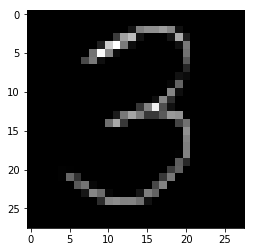

In [107]:
plt.imshow(final_image, cmap=plt.get_cmap('gray'))

In [108]:
predicted_label = non_linear_model.predict([scaled_image])
predicted_label

array([3])